<a href="https://colab.research.google.com/github/Svensone/fast.ai-coursev3/blob/master/%5Bfastai%5D_CV_Bali_Java.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Balinese or Javanes

simple CNN to detect Balinese or Javanese People

In [1]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
from fastai import *
from fastai.vision import *

In [26]:
dance = ['barong', 'kecak', 'legong']
path = Path('drive/My Drive/Colab Notebooks/fast.ai/BaliDance')


In [24]:
# create folder for each dance and download images from .csv
for dance in dance:
  dest = path/dance
  dest.mkdir(parents = True, exist_ok = True)
  download_images(dest.with_suffix('.csv'), dest, max_pics = 200, max_workers=0)

In [27]:
for d in dance:
  print(d)
  verify_images(path/d, delete=True, max_size = 500)

barong


kecak


legong


In [28]:
# create DataBunch

## Data Augmentation with get_transforms(do_flip etc ) possible

np.random.seed(42)
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2, ds_tfms= get_transforms(), size= 224, num_workers=4).normalize(imagenet_stats)

In [29]:
data.classes

['barong', 'kecak', 'legong']

In [30]:
data.c

3

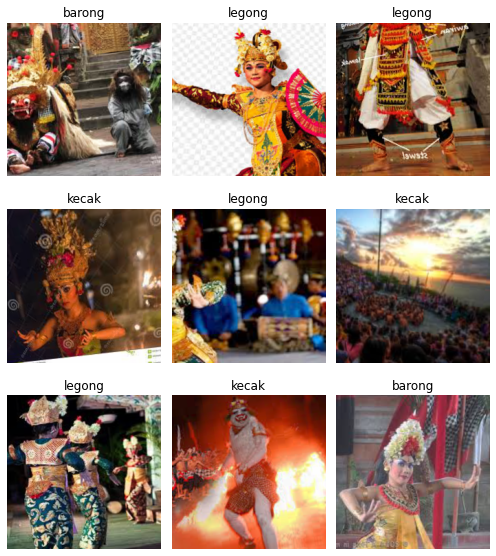

In [31]:
data.show_batch(3, figsize=(7,8))

In [32]:
len(data.train_ds)

480

## Train Model

1. test with ResNet34


In [33]:
learn = cnn_learner(data, models.resnet34, metrics = [accuracy])

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [34]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,time
0,1.538323,1.711650,0.691667,02:00
1,1.139921,1.122723,0.783333,02:01
